In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mnist_dataset = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


a) Nacrtati prvih 25 instanci iz skupa za obučavanje na jednoj slici sa po 5 slika u vrsti. Ispod slike označiti koji je broj predstavljen na slici.

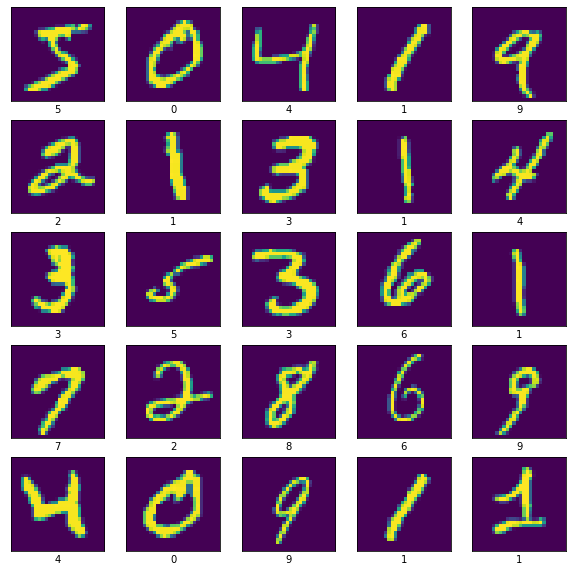

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

b) Enkodirati ciljne promenljive u kategoričke vrednosti.

In [4]:
train_labels_categorical = keras.utils.to_categorical(train_labels)
test_labels_categorical = keras.utils.to_categorical(test_labels)

# Dodatak koji je obavezno uvek uraditi
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

c) Definisati neuronsku mrežu koja ima sledeću arhitekturu:
- Sloj koji vrši poravnavanje dimenzija (eng. flatten)
- Potpuno povezani sloj sa 10 neurona i ReLu aktivacijom
- Potpuno povezani sloj sa brojim neurona koliko postoji klasa i aktivacijom mekog maksimuma

In [5]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                          ])

d) Obučiti ovu mrežu nad podacima za obučavanje. Koristiti Adam optimizator, a od podataka za obučavanje napraviti i podatke za validaciju
u odnosu 80:20 (koristiti `validation_split` parametar u okviru funkcije `fit`).

In [6]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']
              )

history = model.fit(train_images_scaled, train_labels_categorical, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5436 - accuracy: 0.8497 - val_loss: 0.3002 - val_accuracy: 0.9151
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3011 - accuracy: 0.9154 - val_loss: 0.2626 - val_accuracy: 0.9269
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2703 - accuracy: 0.9237 - val_loss: 0.2467 - val_accuracy: 0.9301
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9286 - val_loss: 0.2386 - val_accuracy: 0.9337
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2382 - accuracy: 0.9336 - val_loss: 0.2302 - val_accuracy: 0.9350
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9359 - val_loss: 0.2244 - val_accuracy: 0.9370
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2220 - accuracy: 0.9371 - val_loss: 0.2178 - val_accuracy:

e) Nacrtati kako se menjala tačnost nad podacima za obučavanje i validaciju.

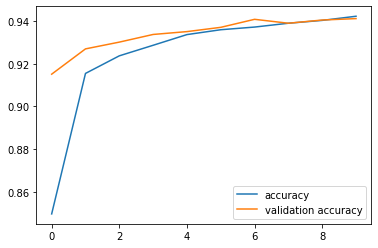

In [7]:
# https://towardsdatascience.com/addressing-the-difference-between-keras-validation-split-and-sklearn-s-train-test-split-a3fb803b733

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'validation accuracy'])

f) Definisati funkciju `get_model(layer_size)` koja definiše model sličnog oblika kao prethodni model (deo pod (c)),
pri čemu je skriveni sloj umesto dimenzije 10 potrebno postaviti na dimenziju `layer_size`.

In [8]:
def get_model(layer_size):
  model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(layer_size, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                          ])
  return model

g) Isprobati veličine skrivenog sloja iz skupa {10, 32, 64, 256}. Obučavanje sprovesti kao u delu (c).

In [9]:
layers = [10, 32, 64, 256]
data = []

for layer in layers:
  new_model = get_model(layer)

  new_model.compile(optimizer='adam',
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy']
                )
  
  history = new_model.fit(train_images_scaled, train_labels_categorical, epochs=10, validation_split=0.2)
  
  data.append(history)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5241 - accuracy: 0.8500 - val_loss: 0.3049 - val_accuracy: 0.9118
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.9128 - val_loss: 0.2780 - val_accuracy: 0.9218
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.9205 - val_loss: 0.2668 - val_accuracy: 0.9230
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9237 - val_loss: 0.2575 - val_accuracy: 0.9269
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9263 - val_loss: 0.2550 - val_accuracy: 0.9285
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9288 - val_loss: 0.2555 - val_accuracy: 0.9304
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2428 - accuracy: 0.9299 - val_loss: 0.2453 - val_accuracy:

h) Na slici prikazati kako se tačnost validacionih podataka menjala kroz epohe. Na slici označiti koja kriva
odgovara kojem modelu (odnosno koliko neurona u skrivenom sloju ima model).

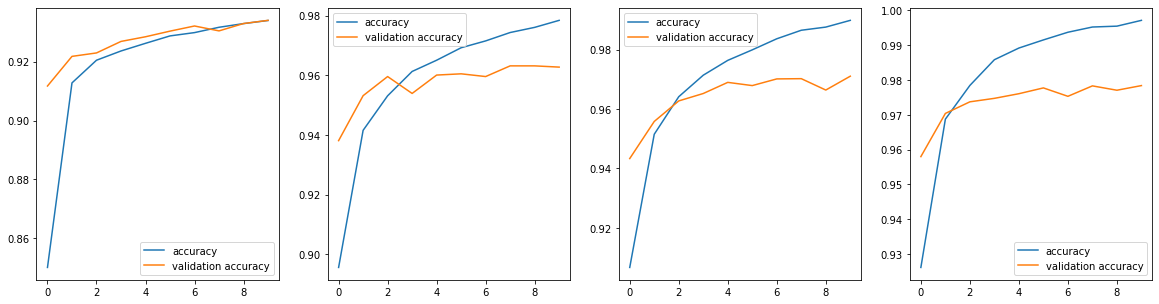

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for count, item in enumerate(data):
  axs[count].plot(item.history['accuracy'])
  axs[count].plot(item.history['val_accuracy'])
  axs[count].legend(['accuracy', 'validation accuracy'])

i) Najbolji model evalurati na skupu za testiranje. Na standardni izlaz napisati koliki su gubitak i tačnost.

In [11]:
best_model = max(data, key=lambda x: x.history['accuracy'])

In [12]:
test_loss, test_accuracy = model.evaluate(test_images_scaled, test_labels_categorical, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 0s - loss: 0.2260 - accuracy: 0.9384
Test loss: 0.22598102688789368
Test accuracy: 0.9383999705314636
